## Problem Statement

### The Given dataset contains the prices and other attributes of diamond. There are  10 attributes included in the dataset including the target ie. Price Perform Regression Analysis to predict the price of diamond.


### Reading the File

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diamonds.csv')

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Univariate Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

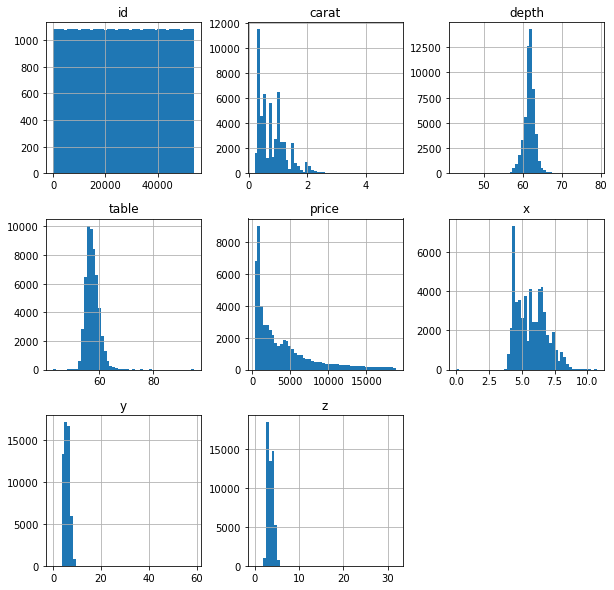

In [7]:
df.hist(bins=50,figsize=(10,10));

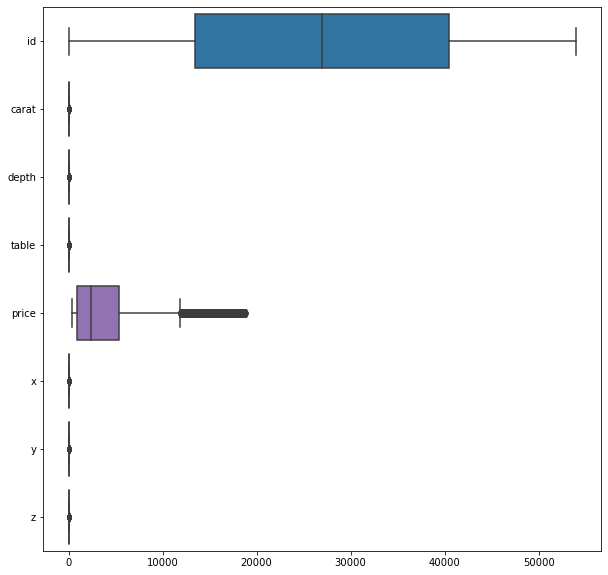

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,orient='h')
plt.show()

### Bivariate Analysis

In [9]:
df.corr()

,id,carat,depth,table,price,x,y,z
id,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


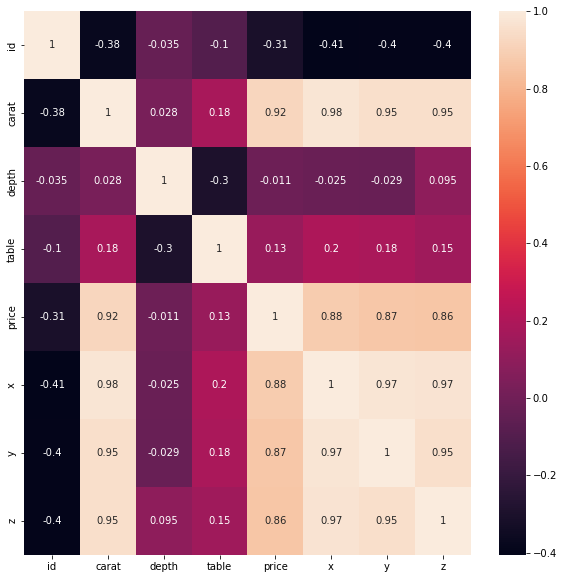

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)
plt.show();

In [11]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Handel Categorical Values

In [12]:
for cols in df.columns:
    if df[cols].dtype=='object':
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        df[cols]=le.fit_transform(df[cols])

In [13]:
df.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


## Droping the columns

In [14]:
df=df.drop(['id'],axis=1)

# Data is Ready to learn from algorithm

In [15]:
X=df.drop('price',axis=1)
y=df['price']

### Data Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

## Training Testing

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20)

In [20]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (43152, 9)
X_test (10788, 9)
y_train (43152,)
y_test (10788,)


# Import The Algorithm

## Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lg=LinearRegression()
lg

LinearRegression()

In [23]:
lg.fit(X_train,y_train)

LinearRegression()

In [24]:
print('Intercept:',lg.intercept_)
print('Coefficient:',lg.coef_)

Intercept: 3936.3464290583784
Coefficient: [ 5.24179960e+03  7.44639276e+01 -4.51975438e+02  4.91986891e+02
 -2.21779816e+02 -2.08448269e+02 -1.56266815e+03  2.49699101e+02
  4.94401218e+00]


In [25]:
pred=lg.predict(X_test)
pred

array([ 1417.98310847,  5244.43765828,   612.41807258, ...,
        3587.98402465,   698.9572978 , 10672.60939294])

## RSquare Score

In [26]:
from sklearn.metrics import r2_score
y_test_pred=lg.predict(X_test)
y_train_pred=lg.predict(X_train)
a=r2_score(y_train,y_train_pred)
b=r2_score(y_test,y_test_pred)
print('traninig={} testing={}'.format(a,b))

traninig=0.8857966816540992 testing=0.8815889065447159


In [27]:
import numpy as np
from sklearn import metrics

In [28]:
meanAbErr = metrics.mean_absolute_error(y_test, pred)
meanSqErr = metrics.mean_squared_error(y_test,pred)
#rootMeanSqErr = np.sqrt(mlr.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
#print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 867.298756747409
Mean Square Error: 1914472.778078857


## Decission Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
dtr=DecisionTreeRegressor(max_depth=8,criterion='squared_error')
dtr

DecisionTreeRegressor(max_depth=8)

In [31]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [32]:
y_pred_train=dtr.predict(X_train)
print("Decision tree training R2 Score",metrics.r2_score(y_train,y_pred_train))

Decision tree training R2 Score 0.9696789620481524


In [33]:
y_pred_test=dtr.predict(X_test)


# Score

In [34]:
dtr.score(X_train,y_train)

0.9696789620481524

In [35]:
dtr.score(X_test,y_test)

0.9667535532090902

In [36]:
import math
R_score= metrics.r2_score(y_test,y_pred_test)
MSE = metrics.mean_squared_error(y_test,y_pred_test)
MAE = metrics.mean_absolute_error(y_test,y_pred_test)
RMSE= math.sqrt(metrics.mean_squared_error(y_test,y_pred_test))
print('R Square',R_score)
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square',RMSE)

R Square 0.9667535532090902
Mean Absolute Error: 410.25611238520514
Mean Square Error: 537529.1747734786
Root Mean Square 733.1638116911381


## Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr=RandomForestRegressor(n_estimators=100,max_depth=8,n_jobs=-1)

In [39]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, n_jobs=-1)

In [40]:
y_pred_tr = rfr.predict(X_train)
print("Random forest Regressor training R2 Score",metrics.r2_score(y_train,y_pred_tr))

Random forest Regressor training R2 Score 0.9753271180956935


In [41]:
y_pred_test_rfr=rfr.predict(X_test)

In [42]:
R_score= metrics.r2_score(y_test,y_pred_test_rfr)
MSE = metrics.mean_squared_error(y_test,y_pred_test_rfr)
MAE = metrics.mean_absolute_error(y_test,y_pred_test_rfr)
RMSE= math.sqrt(metrics.mean_squared_error(y_test,y_pred_test_rfr))
print('R Square',R_score)
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square',RMSE)

R Square 0.972840592688857
Mean Absolute Error: 365.57775356661733
Mean Square Error: 439113.806389892
Root Mean Square 662.6566278170709


## K-Neighboors Regressor Analysis

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [44]:
nigh=KNeighborsRegressor(n_neighbors=100,n_jobs=-1)
nigh.fit(X_train,y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=100)

In [45]:
nigh.score(X_train,y_train)

0.9383481562111187

In [46]:
y_pred_nigh = nigh.predict(X_test)

In [47]:
R_score= metrics.r2_score(y_test,y_pred_nigh)
MSE = metrics.mean_squared_error(y_test,y_pred_nigh)
MAE = metrics.mean_absolute_error(y_test,y_pred_nigh)
RMSE= math.sqrt(metrics.mean_squared_error(y_test,y_pred_nigh))
print('R Square',R_score)
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square',RMSE)

R Square 0.9383822903538699
Mean Absolute Error: 519.0455635891732
Mean Square Error: 996236.284310901
Root Mean Square 998.1163681209225


## Support Vector Regressor

In [48]:
from sklearn import svm

In [49]:
s_v_m=svm.SVR()
s_v_m.fit(X_train,y_train)


SVR()

In [50]:
y_pred_svr=s_v_m.predict(X_test)

In [51]:
R_score= metrics.r2_score(y_test,y_pred_svr)
MSE = metrics.mean_squared_error(y_test,y_pred_svr)
MAE = metrics.mean_absolute_error(y_test,y_pred_svr)
RMSE= math.sqrt(metrics.mean_squared_error(y_test,y_pred_svr))
print('R Square',R_score)
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square',RMSE)

R Square 0.5031130976519949
Mean Absolute Error: 1369.2660022868085
Mean Square Error: 8033676.749116555
Root Mean Square 2834.374137109735


# Result

In [52]:
result=pd.DataFrame()

In [53]:
result['Algorithem_name']=['Linear Regrassion','Deccission Tree regression','Random Forest Regression','KNN Reggression','Support Vector Regression']


In [54]:
result['R2']=[0.88,0.96,0.97,0.93,0.52]

In [56]:
result['Mean Abs Error']=[855.12,413.65,366.66,509.61,1340.61]

In [57]:
result['Mean Square Error']=[1731074.69,552614.82,447402.74,952711.48,7527458.44]

In [58]:
result

,Algorithem_name,R2,MAE,Mean Abs Error,Mean Square Error
0,Linear Regrassion,0.88,855.12,855.12,1731074.69
1,Deccission Tree regression,0.96,413.65,413.65,552614.82
2,Random Forest Regression,0.97,366.66,366.66,447402.74
3,KNN Reggression,0.93,509.61,509.61,952711.48
4,Support Vector Regression,0.52,1340.61,1340.61,7527458.44
